# 텍스트 유사도
임베딩으로 각 단어들의 벡터를 구한 다음 Vector 간의 거리를 계산하는 방법으로 단어 간의 의미가 얼마나 유사한지 계산할 수 있다. 문장 역시 단어들의 묶음이기 때문에 하나의 벡터로 묶어서 문장 간의 유사도를 계산할 수 있다.

챗봇 엔진에 입력되는 문장과 시스템에서 해당 주제의 답변과 연관되어 있는 질문이 얼마나 유사한지 계산할 수 있어야 적절한 답변을 출력할 수 있다. 이처럼 두 문장 간의 유사도를 계산하기 위해서는 문장 내에 존재하는 단어들을 수치화해야 한다. 상황에 따라서 통께적인 방식이 더 적절할 수 있으며, 개발하려는 챗봇의 주제에 따라 사용하면 챗봇 엔진 성능 향상에 도움이 될 수 있다.


## n-gram 유사도
n-gram은 주어진 문장에서 n개의 연속적인 단어 시퀀스(단어 나열)을 의미한다. n-gram은 문장에서 n개의 단어를 토큰으로 사용한다. 이는 이웃한 단어의 출현 횟수를 통계적으로 표현해 텍스트의 유사도를 계산하는 방법이다. 학습 말뭉치 품질만 좋다면 괜찮은 성능을 보여준다. 서로 다른 문장을 n-gram으로 비교하면 단어의 출현 빈도에 기반한 유사도를 계산할 수 있으며 이를 통해 논문 인용이나 도용 정도를 조사할 수 있다.다음 그림은 n에 따라 토큰을 분리한 예이다.

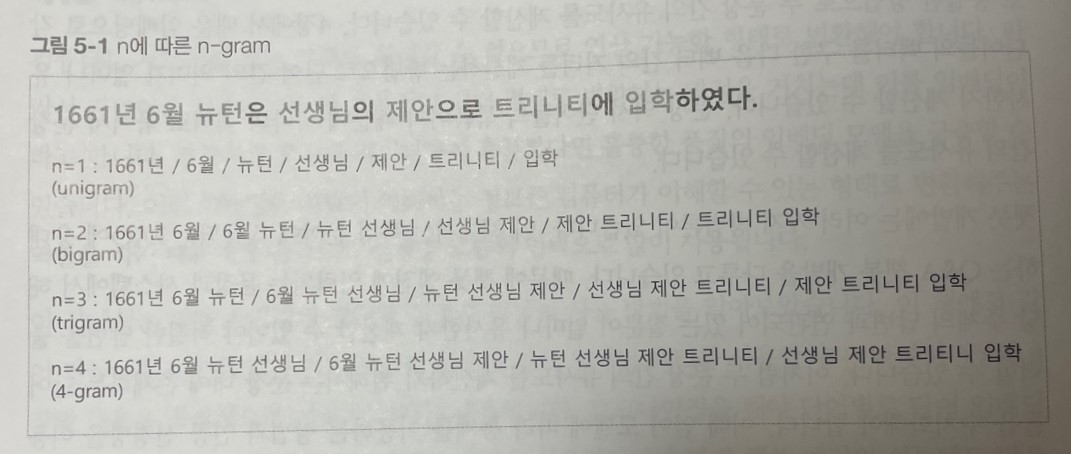

n이 1인 경우 1-gram 또는 유니그램(unigram), 2인 경우 2-gram 또는 바이그램(bigram), 3인 경우 3-gram 또는 트라이그램(trigram)이라 부르며, 4 이상은 숫자만 앞쪽에 붙여 부른다. n-gram이 토큰을 어떻게 분리하는지 2-gram을 예로 들어 알아보자.

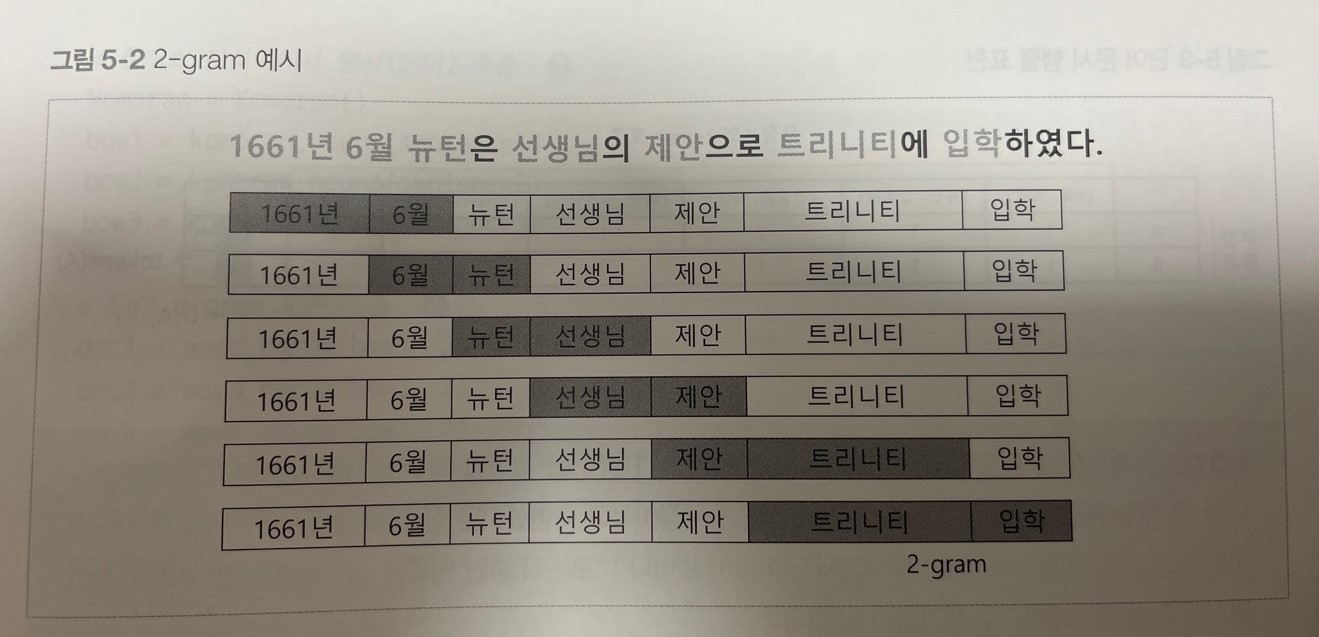

n-gram을 이용해 문장 간의 유사도를 계산한다. 해당 문장을 n-gram으로 토큰을 분리한 후 단어 문서 행렬 (Term-Document Matrix, TDM)을 만든다. 이후 두 문장을 서로 비교해 동일한 단어의 출현 빈도를 확률로 계싼해 유사도를 구할 수 있다. 다음은 두 문장을 A와 B로 표현했을 때 B가 A와 얼마나 유사한지 확률을 구하는 수식이다. 

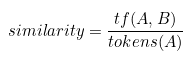


**tf(term frequency)는 두 문장 A와 B에서 동일한 토큰의 출현 빈도를 뜻하며, tokens는 해당 문장에서 전체 토큰의 수**를 의미한다. 여기서 **토큰이란 n-gram으로 분리된 단어**이다. 즉, **기준이 되는 문장 A에서 나온 전체 토큰 중에서 A와 B에 동일한 토큰이 얼마나 있는지 비율로 표현한 수식이다. 1.0에 가까울수록 B가 A에 유사하다**고 볼 수 있다.

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 61.6 MB/s 
     |████████████████████████████████| 453 kB 59.9 MB/s 


In [8]:
from konlpy.tag import Komoran

In [9]:
# 어절 단위 n-gram
def word_ngram(bow, num_gram):
  text = tuple(bow) 
  ngrams = [text[x:x + num_gram] for x in range(0, len(text))]
  return tuple(ngrams)

In [10]:
# 유사도 계산
def similarity (doc1, doc2) :
  cnt = 0
  for token in doc1:
    if token in doc2:
      cnt = cnt +1
  return cnt/len(doc1)

In [11]:
# 문장 정의
sentence1 = "2000년에 사쿠라이 쇼는 게이오에 입학했다."
sentence2 = "2000년에 사쿠라이 쇼는 대학교에 입학했다."
sentence3 = "나는 아라시 랩을 사쿠라이 쇼와 함께 불렀다."


In [12]:
# 형태소 분석기에서 명사(단어) 추출
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

In [13]:
# 단어 n-gram 토큰 추출
doc1 = word_ngram(bow1, 2)
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

In [14]:
# 추출된 n-gram 토큰 출력
print(doc1)
print(doc2)

(('년', '사쿠라이 쇼'), ('사쿠라이 쇼', '게이오'), ('게이오', '입학'), ('입학',))
(('년', '사쿠라이 쇼'), ('사쿠라이 쇼', '대학교'), ('대학교', '입학'), ('입학',))


In [15]:
# 유사도 계산
r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)

In [16]:
# 계산된 유사도 출력
print(r1)
print(r2)

0.5
0.0


n-gram은 문장에 존재하는 모든 단어의 출현 빈도를 확인하는 것이 아닌** 연속되는 문장에서 일부 단어(n으로 설정된 개수만큼)만 확인**하다보니 전체 문장을 고려한 언어 모델보다 정확도가 떨어질 수 있다. n**-gram의 경우 n을 크게 잡을수록 비교 문장의 토큰과 비교할 때 카운트를 놓칠 확률이 커진다. 하지만 n을 작게 잡을수록 카운트 확률은 높아지지만 문맥을 파악하는 정확도는 떨어질 수밖에 없는 구조**이므로 n-gram 모델에서 n의 설정은 매우 중요하다.